In [1]:
%load_ext autotime

time: 155 µs (started: 2023-11-29 12:34:34 +01:00)


In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 1.84 ms (started: 2023-11-29 12:34:34 +01:00)


In [3]:
import joblib
import string
from mie_icon_art import *

2023-11-29 12:34:36.083983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 12:34:36.210446: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 12:34:36.210473: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-29 12:34:37.164403: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

time: 3.55 s (started: 2023-11-29 12:34:34 +01:00)


In [4]:
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

time: 157 ms (started: 2023-11-29 12:34:38 +01:00)


In [5]:
mode_name = {'ait':'aitken', 'acc':'accumulation', 'coa':'coarse'}

time: 291 µs (started: 2023-11-29 12:34:38 +01:00)


In [6]:
height = 41
dxx = 0.05
lam = 0.55   

time: 3.87 ms (started: 2023-11-29 12:34:38 +01:00)


In [7]:
map_ext = (-61.5, -58, 11.5, 15.0)
gridfile = '/work/bb1093/b380891/INPUT/Soufriere_remap/R3B09_DOM02.nc'

time: 2.81 ms (started: 2023-11-29 12:34:38 +01:00)


In [8]:
filenames = sorted(glob.glob('/work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_*.nc'))[161:162]
filenames

['/work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162.nc']

time: 7.8 ms (started: 2023-11-29 12:34:38 +01:00)


In [9]:
model = '/work/bb1070/b382177/mie/icon/05-07-2023/model/model_05-07-2023_new.h5'
fscale = "/work/bb1070/b382177/mie/icon/05-07-2023/model/mlp_min_max.csv"
qt_model = '/work/bb1070/b382177/mie/icon/05-07-2023/model/transformer_new.pkl'

for mode in ['coa']:
    print('Working on %s mode'%mode)
    for filename in filenames:
        print('Processing %s'%filename)
        ds = xr.open_dataset(filename).isel(height=height)
        modes = ds.icon.get_modes(mode_type='mixed')
        
        mie = Mie(ds, gridfile, lam, map_ext, dxx, core=['ash'], shell=['h2o', 'so4', 'nh4', 'no3'], soot='ash', mode=mode)

Working on coa mode
Processing /work/bb1093/b380891/Soufriere_aerodyn_fplume_neu/Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162.nc
time: 42.4 ms (started: 2023-11-29 12:34:38 +01:00)


In [10]:
prop = mie.calculate_optics()

Calculating Shell thickness and Mapping composition to Refractive Indices...
Mapping Mode to Bins...
Calculating Optical properties now...
(73500, 18)
Input data preparation done...
Performing Mie calculations now...
Elapsed time in Mie calculation: 419.2797830104828
Calculating bulk properties now...
Gridding optical properties now...
Mie calcualtions finished.
time: 7min 48s (started: 2023-11-29 12:34:38 +01:00)


In [11]:
eprop = mie.emulate1(model_name=model, fscale=fscale, qt_model=qt_model)

Performing MLP emulation using model checkpoint: /work/bb1070/b382177/mie/icon/05-07-2023/model/model_05-07-2023_new.h5


2023-11-29 12:42:27.179121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-29 12:42:27.179154: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-29 12:42:27.179172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l40003.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2023-11-29 12:42:27.179409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


9/9 [==============================] - 0s 7ms/step
Elapsed time in emulation: 0.23572802543640137
time: 35.8 s (started: 2023-11-29 12:42:27 +01:00)


/work/bb1070/b382177/mlp/figs/julia/Soufriere_aerodyn_fplume_neu_Soufriere-April-2021-fplume-aerodyn-forecast_mode_DOM03_ML_0162_height_41_mode_coa_1.png



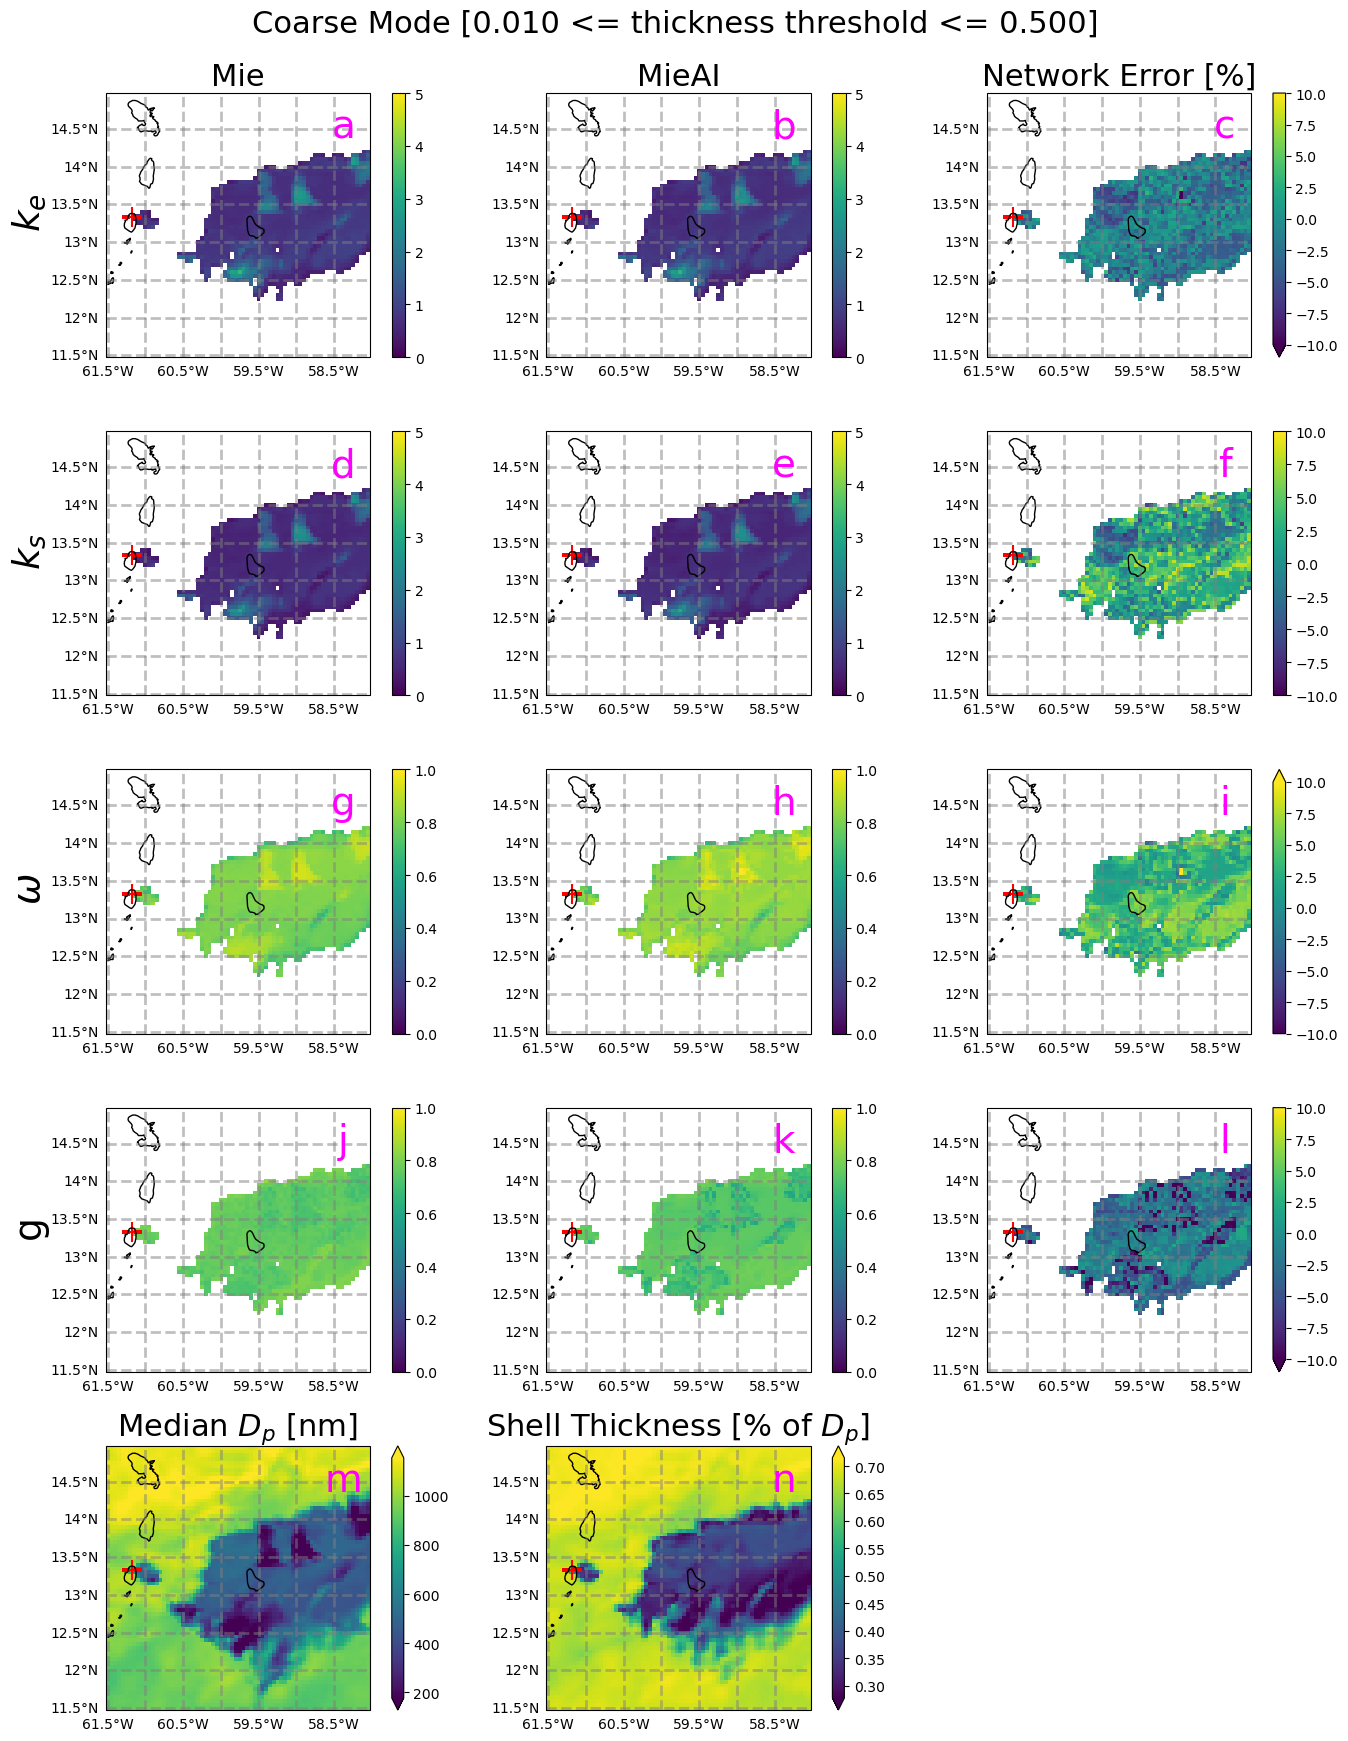

time: 15.8 s (started: 2023-11-29 12:43:02 +01:00)


In [12]:
thres1 = 0.01
thres2 = 0.5

vx, vy = (61.18, 13.33)
cond = (mie.rcoat >= thres1) & (mie.rcoat <= thres2)

fig = plt.figure(figsize=(17, 21))
ax1 = fig.add_subplot(5, 3, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(5, 3, 2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(5, 3, 3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(5, 3, 4, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(5, 3, 5, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(5, 3, 6, projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(5, 3, 7, projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(5, 3, 8, projection=ccrs.PlateCarree())
ax9 = fig.add_subplot(5, 3, 9, projection=ccrs.PlateCarree())
ax10 = fig.add_subplot(5, 3, 10, projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(5, 3, 11, projection=ccrs.PlateCarree())
ax12 = fig.add_subplot(5, 3, 12, projection=ccrs.PlateCarree())

ax13 = fig.add_subplot(5, 3, 13, projection=ccrs.PlateCarree())
ax14 = fig.add_subplot(5, 3, 14, projection=ccrs.PlateCarree())

axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14)

col = 'Extinction'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax1, vmax=5, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax2, vmax=5, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax3, vmax=10, vmin=-10, robust=True)

col = 'Scattering'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax4, vmax=5, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax5, vmax=5, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax6, vmax=10, vmin=-10, robust=True)

col = 'SSA'
# prop[col] = prop['Scattering'] / prop['Extinction']
# eprop[col] = eprop['Scattering'] / eprop['Extinction']
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax7, vmax=1, vmin=0, robust=True)

tmp1 = xr.where(eprop[col]<=1.0, eprop[col], 1.0)
xr.where(cond, tmp1, np.nan).plot(ax=ax8, vmax=1, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax9, vmax=10, vmin=-10, robust=True)

col = 'g'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax10, vmax=1, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax11, vmax=1, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax12, vmax=10, vmin=-10, robust=True)

# xr.where(cond, mie.bins['mu'], np.nan).plot(ax=ax13, cbar_kwargs={'label':''}, robust=True)
# xr.where(cond, mie.rcoat, np.nan).plot(ax=ax14, cbar_kwargs={'label':''}, robust=True)

mie.bins['mu'].plot(ax=ax13, cbar_kwargs={'label':''}, robust=True)
mie.rcoat.plot(ax=ax14, cbar_kwargs={'label':''}, robust=True)

fs = 22

x_leb = -0.22
ax1.text(x_leb, 0.55, '$k_{e}$', transform=ax1.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax4.text(x_leb, 0.55, '$k_{s}$', transform=ax4.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax7.text(x_leb, 0.55, '$\omega$', transform=ax7.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax10.text(x_leb, 0.55, 'g', transform=ax10.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)

ax1.set_title('Mie', fontsize=fs)
ax2.set_title('MieAI', fontsize=fs)
ax3.set_title('Network Error [%]', fontsize=fs)
ax13.set_title('Median $D_{p}$ [nm]', fontsize=fs)
ax14.set_title('Shell Thickness [% of $D_{p}$]', fontsize=fs)

plt.suptitle('%s Mode [%.3f <= thickness threshold <= %.3f]'%(mode_name[mode].capitalize(), thres1, thres2), y=0.92, x=0.51, fontsize=fs)

alps = list(string.ascii_lowercase)

for ax, alp in zip(axes, alps):
    #ax.set_xlabel('Longitude', fontsize=16)
    #ax.set_ylabel('Latitude', fontsize=16)
    ax.scatter(-vx, vy, color='r', marker='+', s=200)
    ax.text(0.9, 0.8, '%s'%alp, transform=ax.transAxes, va='bottom', ha='center', fontsize=fs+6, color='magenta')
    ax.add_feature(cfeature.COASTLINE)
    ax.tick_params(labelsize=fs)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    #ax.set_aspect(0.5)
plt.subplots_adjust(hspace=0.28, wspace=0.01)
ofile = '/work/bb1070/b382177/mlp/figs/julia/'+'_'.join(filename.split('.')[0].split('/')[4:])+'_height_%s_mode_%s_1'%(height, mode)+'.png'
print(ofile+'\n')
plt.savefig(ofile, bbox_inches='tight')
plt.show()

In [13]:
mie.bins['mu'].min(), mie.bins['mu'].max()

(<xarray.DataArray 'mu' ()>
 array(86.69160687),
 <xarray.DataArray 'mu' ()>
 array(1209.67998615))

time: 2.62 ms (started: 2023-11-29 12:43:18 +01:00)
